In [79]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt


plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

In [80]:

h5py.File('datasets/783.hdf5').keys()

<KeysViewHDF5 ['Covariances', 'Expected_returns', 'Final_circuit_sample_probabilities', 'Final_circuit_sample_states', 'Max_cost', 'Min_cost', 'N', 'Normalized_cost', 'Optimizer_maxfev', 'Optimizer_nfev', 'Rng_seed', 'k', 'layers']>

In [81]:
results = {}
lowest_N, highest_N = np.inf, 0
for file_name in os.listdir('datasets'):
    with h5py.File('datasets/'+file_name) as f:
        if f"layer_{f['layers'][()]}" not in list(results.keys()):
            results[f"layer_{f['layers'][()]}"] = [f['Normalized_cost'][()]]
        else:
            results[f"layer_{f['layers'][()]}"].append(f['Normalized_cost'][()])
        if f['N'][()] < lowest_N:
            lowest_N = f['N'][()]
        if f['N'][()] > highest_N:
            highest_N = f['N'][()] 
        if f['N'][()] == 8:
            print(f['layers'][()])
final_results = {}
for layer in list(results.keys()):
    final_results[layer] = (np.mean(results[layer]), np.std(results[layer]), np.min(results[layer]))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
2
2
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [82]:
lowest_N, highest_N

(3, 8)

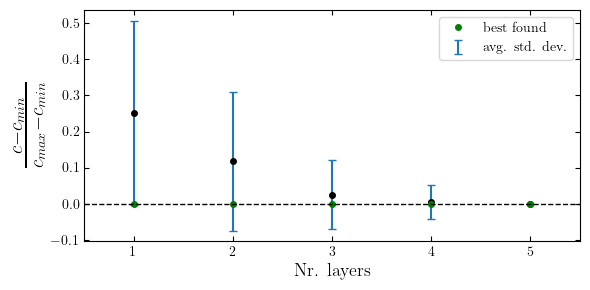

In [83]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
n_layers = [1 + i for i in range(len(list(final_results.keys())))]
ax.errorbar(n_layers, [final_results[key][0] for key in list(final_results.keys())], yerr = [final_results[key][1] for key in list(final_results.keys())], capsize=3, ls='None', label=f'avg. std. dev.')
ax.plot(n_layers,[final_results[key][0] for key in list(final_results.keys())], 'ko', ms=4)
ax.plot(n_layers,[final_results[key][2] for key in list(final_results.keys())], 'go', ms=4, label='best found')

ax.set_xlim(0.5,5.5)
ax.hlines(0,0.5,5.5, ls='--',color='k',lw=1)
ax.set_xticks(n_layers)
ax.set_xticklabels([str(layer) for layer in n_layers])
ax.set_ylabel(r'$\frac{c-c_{min}}{c_{max}-c_{min}}$', size=20)
ax.set_xlabel(r'Nr. layers', size=13)
plt.tight_layout()
ax.legend()
#plt.savefig('out.png', dpi=300)
plt.show()

In [84]:
results = {}
lowest_N, highest_N = np.inf, 0
for file_name in os.listdir('datasets'):
    with h5py.File('datasets/'+file_name) as f:
        if f"size_{f['N'][()]}" not in list(results.keys()):
            results[f"size_{f['N'][()]}"] = {}
        else:
            if f"layer_{f['layers'][()]}" not in list(results[f"size_{f['N'][()]}"].keys()):
                results[f"size_{f['N'][()]}"][f"layer_{f['layers'][()]}"] = [f['Normalized_cost'][()]]
            else:
                results[f"size_{f['N'][()]}"][f"layer_{f['layers'][()]}"].append(f['Normalized_cost'][()])
final_results = {}
for size in list(results.keys()):
    _temp_ = {}
    for layer in list(results[size].keys()):
        _temp_[layer] = (np.mean(results[size][layer]), np.std(results[size][layer]), np.min(results[size][layer]))
    final_results[size] = _temp_

In [102]:
final_results['size_3']

{'layer_2': (2.6290551001784125e-07,
  6.192594646468989e-07,
  1.0060559052504914e-09),
 'layer_1': (0.06766028160951809, 0.18265087017163242, 3.3738685178974492e-09),
 'layer_3': (1.3286952795232844e-07,
  1.717868913180199e-07,
  2.470636917273339e-09),
 'layer_4': (3.370264816948687e-07,
  8.456766416812024e-07,
  6.003761932049656e-09),
 'layer_5': (2.183681141076921e-07,
  3.781647488862619e-07,
  1.1094097862596186e-08)}

In [110]:
[final_results['size_3'][key][0] for key in list(final_results['size_3'].keys())]

[2.6290551001784125e-07,
 0.06766028160951809,
 1.3286952795232844e-07,
 3.370264816948687e-07,
 2.183681141076921e-07]

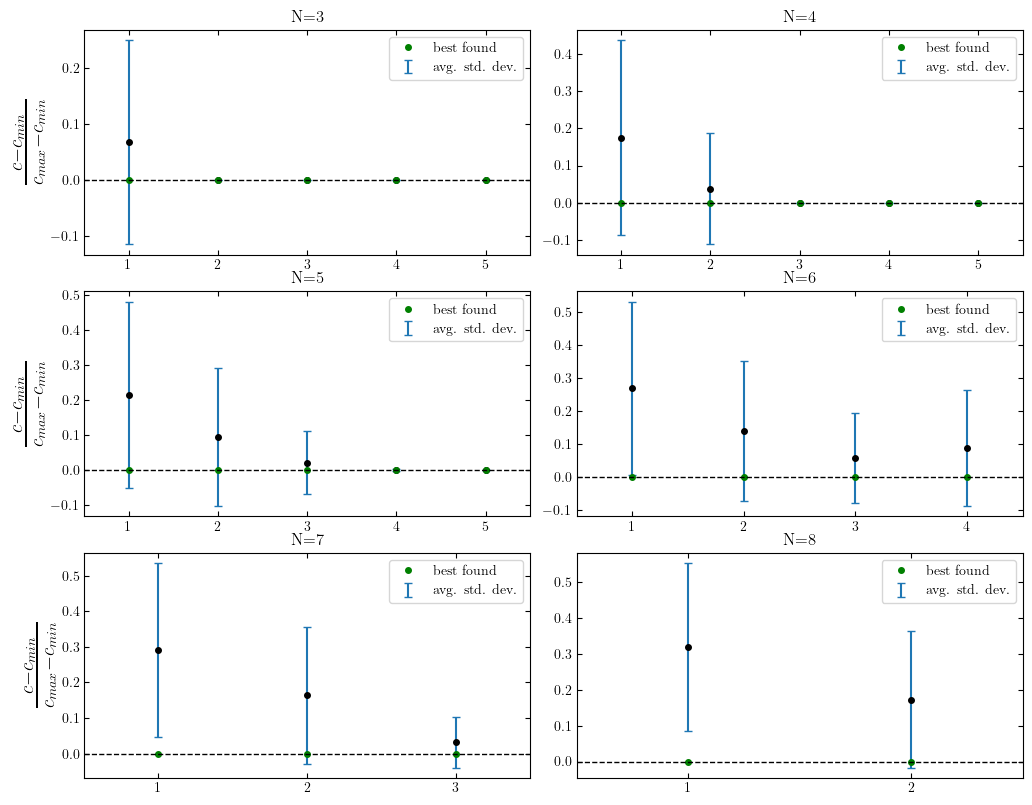

In [119]:
fig2, ax2 = plt.subplots(3,2, figsize=(10,8))
plt.tight_layout()
ax2[0][0].set_title('N=3')
n_layers = np.sort([1 + i for i in range(len(list(final_results['size_3'].keys())))])
ax2[0][0].errorbar(n_layers, [final_results['size_3'][f'layer_{n}'][0] for n in n_layers], yerr = [final_results['size_3'][f'layer_{n}'][1] for n in n_layers], capsize=3, ls='None', label=f'avg. std. dev.')
ax2[0][0].plot(n_layers,[final_results['size_3'][f'layer_{n}'][0] for n in n_layers], 'ko', ms=4)
ax2[0][0].plot(n_layers,[final_results['size_3'][f'layer_{n}'][2] for n in n_layers], 'go', ms=4, label='best found')
ax2[0][0].set_xlim(0.5,max(n_layers)+0.5)
ax2[0][0].hlines(0,0.5,max(n_layers)+0.5, ls='--',color='k',lw=1)
ax2[0][0].set_xticks(n_layers)
ax2[0][0].set_xticklabels([str(layer) for layer in n_layers])
ax2[0][0].set_ylabel(r'$\frac{c-c_{min}}{c_{max}-c_{min}}$', size=20)
ax2[0][0].legend()



ax2[0][1].set_title('N=4')
n_layers = np.sort([1 + i for i in range(len(list(final_results['size_4'].keys())))])
ax2[0][1].errorbar(n_layers, [final_results['size_4'][f'layer_{n}'][0] for n in n_layers], yerr = [final_results['size_4'][f'layer_{n}'][1] for n in n_layers], capsize=3, ls='None', label=f'avg. std. dev.')
ax2[0][1].plot(n_layers,[final_results['size_4'][f'layer_{n}'][0] for n in n_layers], 'ko', ms=4)
ax2[0][1].plot(n_layers,[final_results['size_4'][f'layer_{n}'][2] for n in n_layers], 'go', ms=4, label='best found')
ax2[0][1].set_xlim(0.5,max(n_layers)+0.5)
ax2[0][1].hlines(0,0.5,max(n_layers)+0.5, ls='--',color='k',lw=1)
ax2[0][1].set_xticks(n_layers)
ax2[0][1].set_xticklabels([str(layer) for layer in n_layers])
ax2[0][1].legend()


ax2[1][0].set_title('N=5')
n_layers = np.sort([1 + i for i in range(len(list(final_results['size_5'].keys())))])
ax2[1][0].errorbar(n_layers, [final_results['size_5'][f'layer_{n}'][0] for n in n_layers], yerr = [final_results['size_5'][f'layer_{n}'][1] for n in n_layers], capsize=3, ls='None', label=f'avg. std. dev.')
ax2[1][0].plot(n_layers,[final_results['size_5'][f'layer_{n}'][0] for n in n_layers], 'ko', ms=4)
ax2[1][0].plot(n_layers,[final_results['size_5'][f'layer_{n}'][2] for n in n_layers], 'go', ms=4, label='best found')
ax2[1][0].set_xlim(0.5,max(n_layers)+0.5)
ax2[1][0].hlines(0,0.5,max(n_layers)+0.5, ls='--',color='k',lw=1)
ax2[1][0].set_xticks(n_layers)
ax2[1][0].set_xticklabels([str(layer) for layer in n_layers])
ax2[1][0].set_ylabel(r'$\frac{c-c_{min}}{c_{max}-c_{min}}$', size=20)
ax2[1][0].legend()


ax2[1][1].set_title('N=6')
n_layers = np.sort([1 + i for i in range(len(list(final_results['size_6'].keys())))])
ax2[1][1].errorbar(n_layers, [final_results['size_6'][f'layer_{n}'][0] for n in n_layers], yerr = [final_results['size_6'][f'layer_{n}'][1] for n in n_layers], capsize=3, ls='None', label=f'avg. std. dev.')
ax2[1][1].plot(n_layers,[final_results['size_6'][f'layer_{n}'][0] for n in n_layers], 'ko', ms=4)
ax2[1][1].plot(n_layers,[final_results['size_6'][f'layer_{n}'][2] for n in n_layers], 'go', ms=4, label='best found')
ax2[1][1].set_xlim(0.5,max(n_layers)+0.5)
ax2[1][1].hlines(0,0.5,max(n_layers)+0.5, ls='--',color='k',lw=1)
ax2[1][1].set_xticks(n_layers)
ax2[1][1].set_xticklabels([str(layer) for layer in n_layers])
ax2[1][1].legend()



ax2[2][0].set_title('N=7')
n_layers = np.sort([1 + i for i in range(len(list(final_results['size_7'].keys())))])
ax2[2][0].errorbar(n_layers, [final_results['size_7'][f'layer_{n}'][0] for n in n_layers], yerr = [final_results['size_7'][f'layer_{n}'][1] for n in n_layers], capsize=3, ls='None', label=f'avg. std. dev.')
ax2[2][0].plot(n_layers,[final_results['size_7'][f'layer_{n}'][0] for n in n_layers], 'ko', ms=4)
ax2[2][0].plot(n_layers,[final_results['size_7'][f'layer_{n}'][2] for n in n_layers], 'go', ms=4, label='best found')
ax2[2][0].set_xlim(0.5,max(n_layers)+0.5)
ax2[2][0].hlines(0,0.5,max(n_layers)+0.5, ls='--',color='k',lw=1)
ax2[2][0].set_xticks(n_layers)
ax2[2][0].set_xticklabels([str(layer) for layer in n_layers])
ax2[2][0].set_ylabel(r'$\frac{c-c_{min}}{c_{max}-c_{min}}$', size=20)
ax2[2][0].legend()



ax2[2][1].set_title('N=8')
n_layers = np.sort([1 + i for i in range(len(list(final_results['size_8'].keys())))])
ax2[2][1].errorbar(n_layers, [final_results['size_8'][f'layer_{n}'][0] for n in n_layers], yerr = [final_results['size_8'][f'layer_{n}'][1] for n in n_layers], capsize=3, ls='None', label=f'avg. std. dev.')
ax2[2][1].plot(n_layers,[final_results['size_8'][f'layer_{n}'][0] for n in n_layers], 'ko', ms=4)
ax2[2][1].plot(n_layers,[final_results['size_8'][f'layer_{n}'][2] for n in n_layers], 'go', ms=4, label='best found')
ax2[2][1].set_xlim(0.5,max(n_layers)+0.5)
ax2[2][1].hlines(0,0.5,max(n_layers)+0.5, ls='--',color='k',lw=1)
ax2[2][1].set_xticks(n_layers)
ax2[2][1].set_xticklabels([str(layer) for layer in n_layers])
ax2[2][1].legend()

plt.savefig('out2.png', dpi=200)